# Adv. Data Mining
### Ryan Durfey
## Problem Set 8: Part 3 - Python

## Chapter 10
## Exercise 10

In [1]:
%matplotlib inline

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_20newsgroups, load_digits
from sklearn.feature_extraction.text import TfidfVectorizer

# these are new imports for dimensionality reduction
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
# these are new imports for clustering
from sklearn.cluster import KMeans, MiniBatchKMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [36]:
## part A - generate data

## generate simulated data w/ 20 obs in each of 3 classes, all with 50 variables
clust1 = pd.DataFrame(np.random.randn(20, 50)+1)  # cluster of data w/ mean 1
clust2 = pd.DataFrame(np.random.randn(20, 50)+50)  # cluster of data w/ mean 50
clust3 = pd.DataFrame(np.random.randn(20, 50)+100)  # cluster of data w/ mean 100
    
Frame = clust1.append(pd.DataFrame(data=clust2),ignore_index=True)
Frame = Frame.append(pd.DataFrame(data=clust3),ignore_index=True)

print Frame

            0           1           2           3           4           5   \
0     1.517281    0.548682   -0.791204    1.924636    2.118110    0.899364   
1     0.979966    2.326852    0.129938    1.405869    1.285245    0.599119   
2     0.046742   -0.097077    2.522543    0.632043   -1.381650    0.933490   
3     1.214418   -0.513092    1.621483    1.766823    1.348725    0.820453   
4     1.879326    2.363963    1.664821    0.929398    1.528742   -0.012902   
5     1.353070    0.986472    0.629250    1.318673    0.479222    1.922193   
6     0.601030    1.654119    3.341094    0.541814   -0.471951    0.479533   
7    -0.219000    0.142891    1.709015    0.500604    3.131064    0.440479   
8     1.508451    1.349409    2.863336    0.514002    1.234752    0.697883   
9     1.028300    1.225660    0.570414    0.529879    1.025483    1.643792   
10    0.162639    0.504320    1.757157    0.633287    1.255082    1.225115   
11   -0.005344    0.987947    0.989293    1.589457    2.057089  

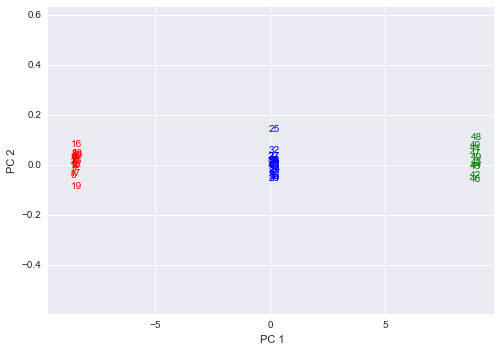

In [210]:
## part B - PCA

## Function that will allow us to plot the PCs, modified to plot each class by color

## NOTE: USE THIS FUNCTION FOR BIPLOTTING --> no good built-in biplot function
def plot_PCA(pca, X, print_row_labels, row_labels, col_labels, biplot=False, y_scale=(None, None), font_size=None):
    # transform our data to PCA space
    X_trans = pca.fit_transform(X)

    # handle the scaling of the plot
    xmin, xmax = min(X_trans[:, 0]), max(X_trans[:, 0])
    if y_scale == (None, None):
        ymin, ymax = min(X_trans[:, 1]), max(X_trans[:, 1])
        xpad, ypad = 1, 0.5
    else:
        ymin, ymax = y_scale
        xpad, ypad = 1, 0.5
        
    plt.xlim(xmin - xpad, xmax + xpad)
    plt.ylim(ymin - ypad, ymax + ypad)

    # plot words instead of points
    if print_row_labels:
        for x, y, label in zip(X_trans[:, 0], X_trans[:, 1], row_labels):
            if label<20:
                if font_size is None:
                    plt.text(x, y, label,color="red")
                else:
                    plt.text(x, y, label, size=font_size)
            elif label>=40:
                if font_size is None:
                    plt.text(x, y, label,color="green")
                else:
                    plt.text(x, y, label, size=font_size)
            else:
                if font_size is None:
                    plt.text(x, y, label,color="blue")
                else:
                    plt.text(x, y, label, size=font_size)
    else:
        for x, y in zip(X_trans[:, 0], X_trans[:, 1]):
            plt.scatter(x, y)
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")

    # if we want a biplot, get the loading and plot
    # axes with labels
    if biplot:
        eigenvectors = pca.components_.transpose()
        for i, col in enumerate(col_labels):
            x, y = 10*eigenvectors[i][0], 10*eigenvectors[i][1]
            plt.arrow(0, 0, x, y, color='r', width=0.002, head_width=0.05)
            plt.text(x* 1.4, y * 1.4, col, color='r', ha='center', va='center')
    
    plt.show()


    
pca = PCA(n_components=2)

## make sure to scale the data first before applying PCA. PCA NEEDS SCALED DATA.
X_scaled = scale(Frame, with_mean=True, with_std=True)
plot_PCA(pca, X_scaled, True, Frame.columns, Frame.columns, biplot=False)

The 3 classes are very clearly separated here, so we will move on to part c.

In [69]:
## part C - k-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, verbose=True, n_jobs=1)
kmeans.fit(Frame)

print kmeans.labels_

Initialization complete
Iteration  0, inertia 5943.360
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 6303.104
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5696.847
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5674.414
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5377.241
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5293.085
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5357.912
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5373.264
Iteration  1, inertia 2854.430
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5316.961
Iteration  1, inertia 2854.430
Converged at iteration 1
I

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [71]:
x = kmeans.labels_
#ps = pd.Series([tuple(i) for i in x])
counts = pd.value_counts(x)
print counts

2    20
1    20
0    20
dtype: int64


From the cluster labels as well as the frequency counts, we can see that the k-means clustering produced the exact same cluster labels with which our data was created. This isn't a big surprise, however, because the clusters were created very far apart.

In [75]:
## part D - k-means clustering w/ 2 clusters
kmeans2 = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, verbose=True, n_jobs=1)
kmeans2.fit(Frame)

print kmeans2.labels_

x2 = kmeans2.labels_
#ps = pd.Series([tuple(i) for i in x])
counts2 = pd.value_counts(x2)
print counts2

Initialization complete
Iteration  0, inertia 2397464.013
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2404091.161
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2401412.692
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2383488.499
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2412955.674
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2395703.433
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2400207.302
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2417039.988
Iteration  1, inertia 1202215.176
Converged at iteration 1
Initialization complete
Iteration  0, inertia 2401287.988
Iterat

Using 2 Clusters, the entire middle cluster was absorbed into the first cluster. This is very likely due to the fact that the first and second clusters that were generated have means that are slightly closer than between the second and third. The distance between the means of the first and second cluster is 49 (50-1) whereas between the second and third it is 50 (100-50).

In [78]:
## part E - k-means clustering with 4 clusters
kmeans3 = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, verbose=True, n_jobs=1)
kmeans3.fit(Frame)

print kmeans3.labels_

x3 = kmeans3.labels_
counts3 = pd.value_counts(x3)
print counts3


Initialization complete
Iteration  0, inertia 5085.924
Iteration  1, inertia 2777.965
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5428.064
Iteration  1, inertia 2784.646
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5246.893
Iteration  1, inertia 2785.646
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5008.080
Iteration  1, inertia 2793.790
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5787.716
Iteration  1, inertia 2769.399
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5124.445
Iteration  1, inertia 2786.052
Converged at iteration 1
Initialization complete
Iteration  0, inertia 4792.405
Iteration  1, inertia 2786.324
Iteration  2, inertia 2775.737
Converged at iteration 2
Initialization complete
Iteration  0, inertia 5323.744
Iteration  1, inertia 2775.162
Converged at iteration 1
Initialization complete
Iteration  0, inertia 5229.787
Iteration  1, inertia 2757

With 4 clusters, we see that one cluster was simply split into 2 clusters with the remaining 2 (of the original 3 clusters) remaining intact.

In [98]:
## part F - k-means w/ 3 clusters on first two PCs

scores = pca.transform(Frame) # get the 2 components scores

kmeans4 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, verbose=True, n_jobs=1)
kmeans4.fit(scores)

print kmeans4.labels_

x4 = kmeans4.labels_
counts4 = pd.value_counts(x4)
print counts4

Initialization complete
Iteration  0, inertia 390.879
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 349.190
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 469.046
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 428.927
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 332.690
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 453.765
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 669.552
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 310.671
Converged at iteration 0
Initialization complete
Iteration  0, inertia 405.187
Iteration  1, inertia 242.403
Converged at iteration 1
Initialization complete
Iteration  0, inertia 481

Once again, we get a perfect match of clusters!

In [126]:
## part G - scale data & fit k-means w/ 3 clusters
kmeans5 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, verbose=True, n_jobs=1)
kmeans5.fit(X_scaled)

print kmeans5.labels_

x5 = kmeans5.labels_
counts5 = pd.value_counts(x5)
print counts5

Initialization complete
Iteration  0, inertia 3.337
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.477
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.461
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.038
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.306
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.384
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.240
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.325
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.524
Iteration  1, inertia 1.745
Converged at iteration 1
Initialization complete
Iteration  0, inertia 3.284
Ite

Even after scaling the data before running k-means clustering, we still receive a perfect match to the intended clusters of the generated data. While scaling can sometimes affect the distance between data points and/or clusters, the original distances between points of different clusters was too great to result in the outcome being affected.